The processed dataset:  [[  4.00000000e-01   6.00000000e-01   0.00000000e+00 ...,   0.00000000e+00
    1.80790960e-01   0.00000000e+00]
 [  0.00000000e+00   2.00000000e-01   1.00000000e-01 ...,   4.00000000e+00
    2.41228070e-01   0.00000000e+00]
 [ -5.00000000e-01   0.00000000e+00   0.00000000e+00 ...,   6.00000000e+00
    2.11981567e-01   0.00000000e+00]
 ..., 
 [ -1.00000000e-01   5.00000000e-01   0.00000000e+00 ...,   3.00000000e+00
    3.95683453e-01   4.91100000e+04]
 [  1.00000000e-01   3.00000000e-01   1.00000000e-01 ...,   4.00000000e+00
    4.72222222e-01   5.07740000e+04]
 [ -1.00000000e-01   7.00000000e-01   5.00000000e-01 ...,   7.00000000e+00
    2.96943231e-01   6.23570000e+04]]
Results:
Coefficients: 
 [[ -3.08299107e+01  -7.06741131e+01   1.52552739e+02  -3.69627990e+02
   -2.72644864e+02   3.23729289e+02   1.56363415e+02  -4.19499681e+02
    2.03916872e+02   1.00842087e+02   4.54784556e+01   8.62479735e+01
   -6.73691991e+01  -3.28275104e+01  -1.24236833e+02   1.1230

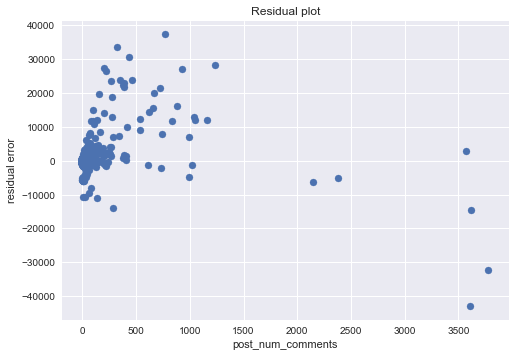

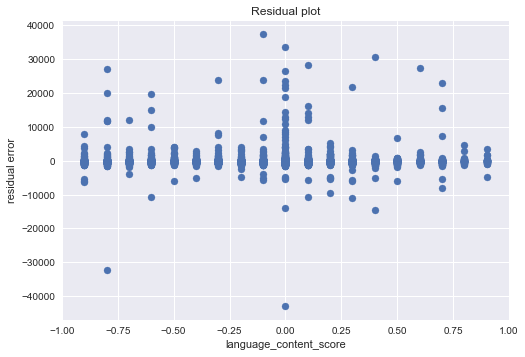

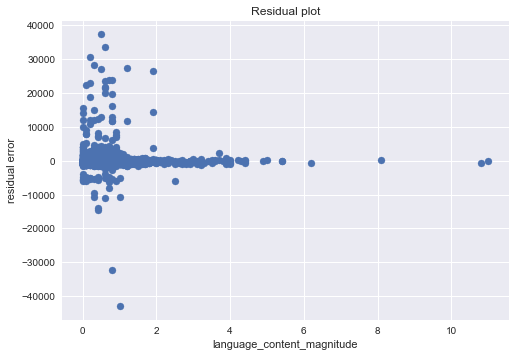

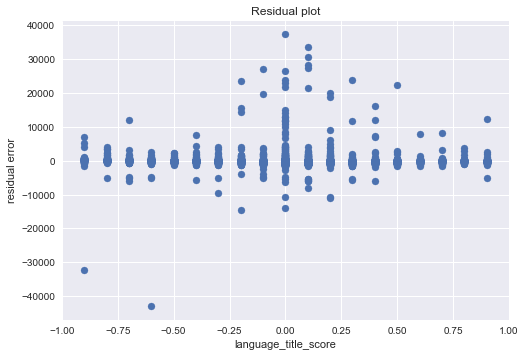

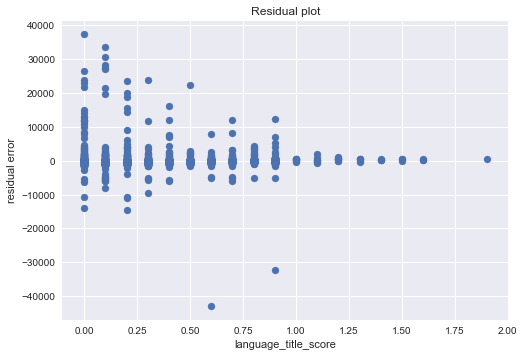

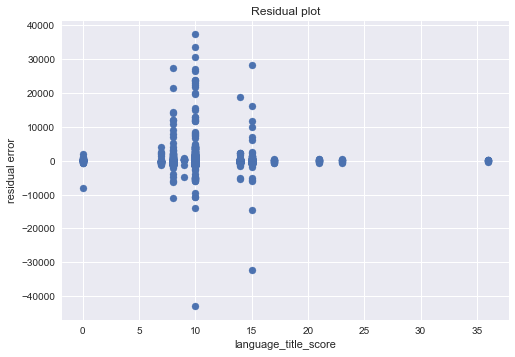

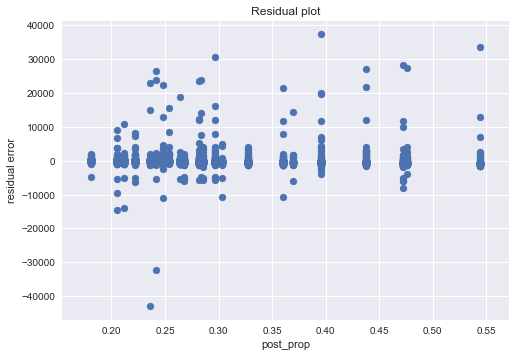

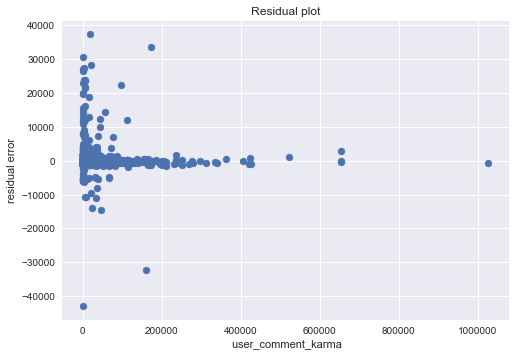

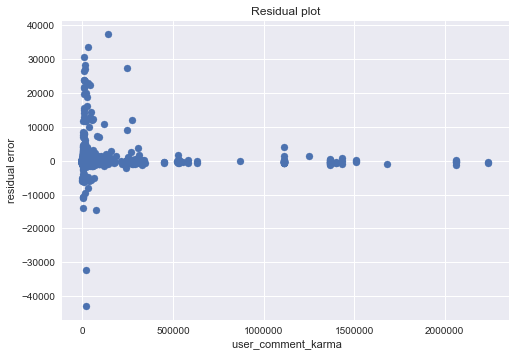

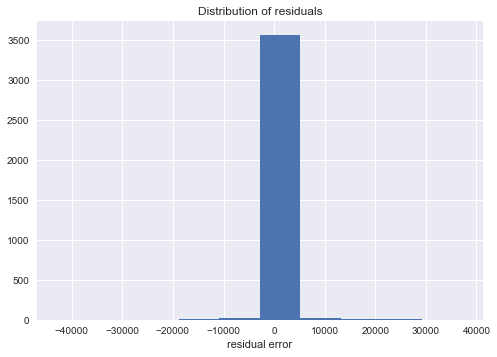

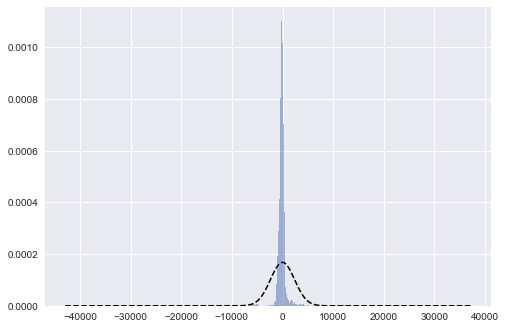

R2 of every fold with K=10:  [ 0.55839471  0.36862735  0.33325674  0.43711893  0.63183374  0.52522396
  0.55462881  0.47839807  0.46538218  0.10596491]
MSE of every fold with K=10:  [ 8930172.34097651  2259865.27617209  9708448.89357207  4683846.81632285
  7933106.14761544  5882986.65751686  2543249.09661588  9232521.01217281
  5095649.39051057  7604565.46537636]
Mean of 10-fold cross-validated R2: 0.45 (+/- 0.28)
Mean of 10-fold cross-validated MSE: 6387441.11 (+/- 5141970.62)


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
import pylab as P
import numpy as np

#model packages
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
#from sklearn.cross_validation import cross_val_score, cross_val_predic

#evaluate packages
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.datasets import load_digits

#validation curve
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge

#rfe with cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# learning curve
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC


dataset = pd.read_csv('popularitybot_datamodel_reduceclass_hours.csv')
#dataset = pd.read_csv('popularitybot_datamodel2.csv')
# 0.54 dataset = pd.read_csv('popularitybot_datamodel_reduceclass.csv')
#dataset = pd.read_csv('popularitybot_datamodel_reduceclass_outliers.csv')
dataset.isnull().any()
dataset.head()
dataset.describe()


#pre-processing features
language_content_score= dataset.language_content_score.values.reshape((len(dataset.language_content_score), 1))
language_content_magnitude  = dataset.language_content_magnitude.values.reshape((len(dataset.language_content_magnitude), 1))
language_title_score  = dataset.language_title_score.values.reshape((len(dataset.language_title_score), 1))
language_title_magnitude  = dataset.language_title_magnitude.values.reshape((len(dataset.language_title_magnitude), 1))
post_domain = dataset.post_domain.values.reshape((len(dataset.post_domain), 1))
post_gilded  = dataset.post_gilded.values.reshape((len(dataset.post_gilded), 1))
post_hide_score =  dataset.post_hide_score.values.reshape((len(dataset.post_hide_score), 1))
post_subreddit =  dataset.post_subreddit.values.reshape((len(dataset.post_subreddit), 1))
post_is_reddit_media_domain =  dataset.post_is_reddit_media_domain.values.reshape((len(dataset.post_is_reddit_media_domain), 1))
post_num_comments =  dataset.post_num_comments.values.reshape((len(dataset.post_num_comments), 1))
post_num_crossposts =  dataset.post_num_crossposts.values.reshape((len(dataset.post_num_crossposts), 1))
post_over_18 =  dataset.post_over_18.values.reshape((len(dataset.post_over_18), 1))
user_comment_karma =  dataset.user_comment_karma.values.reshape((len(dataset.user_comment_karma), 1))
user_is_gold =  dataset.user_is_gold.values.reshape((len(dataset.user_is_gold), 1))
user_is_mod =  dataset.user_is_mod.values.reshape((len(dataset.user_is_mod), 1))
user_link_karma =  dataset.user_link_karma.values.reshape((len(dataset.user_link_karma), 1))
user_verified =  dataset.user_verified.values.reshape((len(dataset.user_verified), 1))
vision_blue =  dataset.vision_blue.values.reshape((len(dataset.vision_blue), 1))
vision_green =  dataset.vision_green.values.reshape((len(dataset.vision_green), 1))
vision_red =  dataset.vision_red.values.reshape((len(dataset.vision_red), 1))
post_age =  dataset.post_age.values.reshape((len(dataset.post_age), 1))
post_prop = dataset.post_prop.values.reshape((len(dataset.post_prop),1))

####prediction
post_score = dataset.post_score.values.reshape((len(dataset.post_score),1))



#hot encode categorical variable
enc = preprocessing.OneHotEncoder()
enc.fit(post_domain)
transformed_post_domain  = enc.transform(post_domain).toarray()

#enc = preprocessing.OneHotEncoder()
#enc.fit(post_gilded)
#transformed_post_gilded  = enc.transform(post_gilded).toarray()

enc = preprocessing.OneHotEncoder()
enc.fit(post_hide_score)
transformed_post_hide_score = enc.transform(post_hide_score).toarray()

enc = preprocessing.OneHotEncoder()
enc.fit(post_subreddit)
transformed_post_subreddit = enc.transform(post_subreddit).toarray()

enc = preprocessing.OneHotEncoder()
enc.fit(post_is_reddit_media_domain)
transformed_post_is_reddit_media_domain = enc.transform(post_is_reddit_media_domain).toarray()

enc = preprocessing.OneHotEncoder()
enc.fit(post_over_18)
transformed_post_over_18 = enc.transform(post_over_18).toarray()

enc = preprocessing.OneHotEncoder()
enc.fit(user_is_gold)
transformed_user_is_gold= enc.transform(user_is_gold).toarray()

enc = preprocessing.OneHotEncoder()
enc.fit(user_is_mod)
transformed_user_is_mod = enc.transform(user_is_mod).toarray()

enc = preprocessing.OneHotEncoder()
enc.fit(user_verified)
transformed_user_verified  = enc.transform(user_verified).toarray()


# prepare datasets to be fed in the regression model
#predict post_score given all other EV

CV =  dataset.post_score.values.reshape((len(dataset.post_score), 1))
data = np.concatenate((language_content_score,language_content_magnitude,
                       language_title_score,language_title_magnitude,transformed_post_domain,
                       post_gilded,transformed_post_hide_score,transformed_post_subreddit,
                       transformed_post_is_reddit_media_domain,post_num_comments,post_num_crossposts,
                      transformed_post_over_18,user_comment_karma,transformed_user_is_gold,transformed_user_is_mod,
                       user_link_karma,transformed_user_verified,vision_blue,vision_green,vision_red,post_age,post_prop), axis=1)

print("The processed dataset: ", np.concatenate((data, CV), axis=1))

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(data, CV)

# get the predictions on the training data
predicted_results = regr.predict(data)

print("Results:")
# The coefficients (mis, b) of y = misxis + b
print('Coefficients: \n', regr.coef_)
print('Intercept (b): \n', regr.intercept_)

print("Mean residual sum of squares = %.2f"
      % np.mean((regr.predict(data) - CV) ** 2))
print('R2 = %.2f' % regr.score(data,CV))



# to see how the residual errors behave
residual_error = CV - predicted_results
print("Mean of residuals =", np.mean(residual_error))
print("Standard deviation of residuals =", np.std(residual_error))



# residual plot of error vs. post_num_comments?
plt.figure(5)
#plt.plot((-0.5,1.5),(0,0), 'r--')
plt.scatter(post_num_comments ,residual_error,label='residual error')
plt.title("Residual plot")
plt.xlabel("post_num_comments")
plt.ylabel("residual error")
plt.show()

# residual plot of error vs. post_num_comments?
plt.figure(5)
#plt.plot((-0.5,1.5),(0,0), 'r--')
plt.scatter(language_content_score ,residual_error,label='residual error')
plt.title("Residual plot")
plt.xlabel("language_content_score")
plt.ylabel("residual error")
plt.show()

# residual plot of error vs. language_content_magnitude?
plt.figure(5)
#plt.plot((-0.5,1.5),(0,0), 'r--')
plt.scatter(language_content_magnitude ,residual_error,label='residual error')
plt.title("Residual plot")
plt.xlabel("language_content_magnitude")
plt.ylabel("residual error")
plt.show()

# residual plot of error vs. language_title_score?
plt.figure(5)
#plt.plot((-0.5,1.5),(0,0), 'r--')
plt.scatter(language_title_score ,residual_error,label='residual error')
plt.title("Residual plot")
plt.xlabel("language_title_score")
plt.ylabel("residual error")
plt.show()


# residual plot of error vs. language_title_magnitude?
plt.figure(5)
#plt.plot((-0.5,1.5),(0,0), 'r--')
plt.scatter(language_title_magnitude ,residual_error,label='residual error')
plt.title("Residual plot")
plt.xlabel("language_title_score")
plt.ylabel("residual error")
plt.show()

# residual plot of error vs. post_domain?
plt.figure(5)
#plt.plot((-0.5,1.5),(0,0), 'r--')
plt.scatter(post_domain ,residual_error,label='residual error')
plt.title("Residual plot")
plt.xlabel("language_title_score")
plt.ylabel("residual error")
plt.show()

# residual plot of error vs. post_prop?
plt.figure(5)
#plt.plot((-0.5,1.5),(0,0), 'r--')
plt.scatter(post_prop ,residual_error,label='residual error')
plt.title("Residual plot")
plt.xlabel("post_prop")
plt.ylabel("residual error")
plt.show()

# residual plot of error vs.  post_gilded?
plt.figure(5)
#plt.plot((-0.5,1.5),(0,0), 'r--')
plt.scatter( user_comment_karma ,residual_error,label='residual error')
plt.title("Residual plot")
plt.xlabel(" user_comment_karma")
plt.ylabel("residual error")
plt.show()

# residual plot of error vs.  post_gilded?
plt.figure(5)
#plt.plot((-0.5,1.5),(0,0), 'r--')
plt.scatter( user_link_karma ,residual_error,label='residual error')
plt.title("Residual plot")
plt.xlabel(" user_comment_karma")
plt.ylabel("residual error")
plt.show()


# distribution of residuals
plt.figure(6)
plt.hist(residual_error)
plt.title("Distribution of residuals")
plt.xlabel("residual error")
plt.show()

# distribution of residuals with normal distribution
plt.figure(7)
n, bins, patches = plt.hist(residual_error, 500, normed=1,  alpha = 0.5)
y_pdf = P.normpdf(bins, np.mean(residual_error), np.std(residual_error))
l = P.plot(bins, y_pdf, 'k--', linewidth=1.5)
plt.show()



#calculating 10 fold corss validation results
model = linear_model.LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state=0)
scores = cross_val_score(model, data, CV, scoring = 'neg_mean_squared_error', cv=kf)
scores1 = cross_val_score(model, data, CV, scoring = 'r2', cv=kf)
print("R2 of every fold with K=10: ", abs(scores1))
print("MSE of every fold with K=10: ", abs(scores))
print("Mean of 10-fold cross-validated R2: %0.2f (+/- %0.2f)" % (abs(scores1.mean()), scores1.std() * 2))
print("Mean of 10-fold cross-validated MSE: %0.2f (+/- %0.2f)" % (abs(scores.mean()), scores.std() * 2))







selector = RFE(model, 20, step =1)
Y = CV.ravel()
selector = selector.fit(data, Y)
selector.ranking_

# 

In [5]:
dataset.head()
print("the Processed dataset:", np.concatenate((data, CV),axis = 1))

the Processed dataset: [[  4.00000000e-01   6.00000000e-01   0.00000000e+00 ...,   0.00000000e+00
    1.80790960e-01   0.00000000e+00]
 [  0.00000000e+00   2.00000000e-01   1.00000000e-01 ...,   4.00000000e+00
    2.41228070e-01   0.00000000e+00]
 [ -5.00000000e-01   0.00000000e+00   0.00000000e+00 ...,   6.00000000e+00
    2.11981567e-01   0.00000000e+00]
 ..., 
 [ -1.00000000e-01   5.00000000e-01   0.00000000e+00 ...,   3.00000000e+00
    3.95683453e-01   4.91100000e+04]
 [  1.00000000e-01   3.00000000e-01   1.00000000e-01 ...,   4.00000000e+00
    4.72222222e-01   5.07740000e+04]
 [ -1.00000000e-01   7.00000000e-01   5.00000000e-01 ...,   7.00000000e+00
    2.96943231e-01   6.23570000e+04]]
